# NAILDOH - IED Merge 2 (IED)

## Resources

In [2]:
# Libraries
library(tidyverse) # for data manipulation

# Functions
factorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "character")) # that looks for variables with the character class 
      df[[i]] = as.factor(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

unfactorize <- function(df){ # Create a function
  for(i in which(sapply(df, class) == "factor")) # that looks for variables with the character class 
      df[[i]] = as.character(df[[i]]) # and converts them to factor (i.e., categorical) class
  return(df)
}

## Prep IED

In [4]:
# Data
df2 <- factorize(read.csv("20240603_PhD_IEDSubset.csv")) # Put csv into a dataframe called docData
colnames(df2) # Get an overview of the dataframe
dim(df2)
glimpse(df2)

[1] "docid"          "nationalOrigin" "authorGender"   "relMin"        
 [5] "U"              "M"              "S"              "F"             
 [9] "L"              "docmonth"       "docyear"        "docauthorname" 
[13] "authorLocation" "firstnames"     "docauthorid"

[1] 253  15

Rows: 253
Columns: 15
$ docid          <int> 21062, 21324, 21334, 21470, 21549, 21561, 21737, 21759,…
$ nationalOrigin <fct> Irish, Irish, Irish, Irish, Irish, Irish, Irish, Irish,…
$ authorGender   <fct> F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F…
$ relMin         <lgl> NA, NA, FALSE, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ U              <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ M              <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ S              <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ F              <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ L              <lgl> NA, NA, FALSE, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ docmonth       <int> 11, 5, 10, 3, 1, 9, 12, 4, 10, 5, 10, 11, 1, 12, 2, 10,…
$ docyear        <int> 1871, 1892, 1891, 1800, 1839, 1838, 1844, 1880, 1888, 1…
$ docauthorname  <fct> E. Rothwell, Isabella Weir Moore, Mary Savage, Aunt Dol…
$ authorLocation <

### Checking / correcting

In [71]:
#df1[is.na(df1$docyear),]

#df2[grepl("Sm.th", df2$docauthorname),]

#vals <- c("23950")
#df2[df2$docid %in% vals,]
#df2 <- df2[!df2$docid %in% vals, ]

#letters[letters$docauthorid=="per0032629",]
#letters[is.na(letters$docyear),]

### Creating new variables

In [18]:
summary(df2$relMin)
summary(df2$nationalOrigin)

   Mode   FALSE    NA's 
logical      10     243 

Irish 
  253

In [21]:
df2$catholic <- FALSE
df2$catholic[is.na(df2$relMin)] <- NA # Using relMin here to capture discovery work
df2$catholic[df2$relMin==FALSE] <- FALSE # ReligionNew ok here bc none found during discovery
summary(df2$catholic)

df2$irish <- NA
df2$irish[df2$nationalOrigin=="Irish"] <- TRUE
summary(df2$irish)

   Mode   FALSE    NA's 
logical      10     243 

   Mode    TRUE 
logical     253 

In [27]:
df2$otherChristian <- FALSE
df2$otherChristian[df2$relMin==FALSE] <- TRUE # To capture discovery for Protestants
df2$otherChristian[is.na(df2$relMin)] <- NA #Above for Catholics
summary(df2$otherChristian)

df2$otherUK <- NA
df2$otherUK[df2$nationalOrigin=="Irish"] <- FALSE
summary(df2$otherUK)

   Mode    TRUE    NA's 
logical      10     243 

   Mode   FALSE 
logical     253 

In [28]:
#What is the gender breakdown by doc and by author for letters

lettersG <- df2 %>% #Create new variable for the collection of letters
reframe(authorGender) #summarized by gender
table(lettersG$authorGender) #plot
prop.table(as.matrix(table(lettersG$authorGender)), 2)*100

# NAs for letters
df2 %>% 
filter(is.na(authorGender)) %>% 
select(docauthorid) %>% 
nrow()

letterAuthorsG <- df2 %>% #Create new variable for the writer pool
reframe(authorGender, group_by=docauthorid) %>% #summarized by gender and grouped by author
unique() #unique values only
table(letterAuthorsG$authorGender) #plot author breakdown
prop.table(as.matrix(table(letterAuthorsG$authorGender)), 2)*100 

# NAs for writer pool
df2 %>% 
filter(is.na(authorGender)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


  F   M 
176  77 

F,69.56522
M,30.43478


[1] 0


 F  M 
65 20 

F,76.47059
M,23.52941


[1] 0

## Merge Tables

Now, I need to see what the total corpus looks like by combining the NAILDOH and IED-to-date dataframes.

In [33]:
df2$authorName <- df2$docauthorname

In [34]:
df1 <- unfactorize(read.csv("20240514_PhD_NaildohSubset.csv"))
#df2 <- unfactorize(read.csv("20240603_PhD_IEDSubset.csv"))

vars1 <- colnames(df1)
vars2 <- colnames(df2)
vars <- intersect(vars1, vars2)
df1 <- df1[vars]

df1 <- df1[,c("docid",
       "docyear",
       "docmonth",
       "authorName", 
       "docauthorid",
       "authorLocation", 
       "authorGender",
       "nationalOrigin", 
       "irish", 
       "otherUK", 
       "relMin", 
       "catholic", 
       "otherChristian", 
       "U",
       "M",
       "S",
       "F",
       "L")]

df2 <- df2[,c("docid",
       "docyear",
       "docmonth",
       "authorName", 
       "docauthorid",
       "authorLocation", 
       "authorGender",
       "nationalOrigin", 
       "irish", 
       "otherUK", 
       "relMin", 
       "catholic", 
       "otherChristian", 
       "U",
       "M",
       "S",
       "F",
       "L")]

df <- rbind(df1, df2)
letters <- factorize(df)
glimpse(letters)

Rows: 689
Columns: 18
$ docid          <fct> S2344-D040, S2344-D043, S2344-D051, S2344-D052, S2344-D…
$ docyear        <int> 1836, 1842, 1853, 1853, 1853, 1853, 1853, 1854, 1854, 1…
$ docmonth       <int> NA, 11, NA, 9, 10, 12, 12, 1, 1, 2, 4, 4, 6, NA, 12, 1,…
$ authorName     <fct> Susannah Strickland Moodie, Susannah Strickland Moodie,…
$ docauthorid    <fct> per0004772, per0004772, per0004772, per0004772, per0004…
$ authorLocation <fct> Canada, Canada, Canada, Canada, Canada, Canada, Canada,…
$ authorGender   <fct> F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, F…
$ nationalOrigin <fct> English, English, English, English, English, English, E…
$ irish          <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ otherUK        <lgl> TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE, T…
$ relMin         <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ catholic       <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ otherChristian <

In [65]:
# Removing letters for which there is no year because this is a key constraint.
vals <- letters %>% 
filter(is.na(docyear)) %>% 
pull(docid)

nrow(letters)
letters <- letters[!letters$docid %in% vals,]
nrow(letters)

[1] 689

[1] 686

Canada and women are well represented in terms of letter counts because of the prolific writers but they are underrepresented in terms of the author pool, even after attempting to achieve parity by randomly sampling additional writers from the Irish Emigrant Database. This was because the authors whose gender was "unknown" were mostly resolved to Male after close inspection. I am reluctant to remove anyone from the randomly sampled writers, especially from those whose gender was initially unknown because these writers are more likely to be underprivileged. I therefore am proceeding with the unequal but improved gender balance. In terms of the writing pool, Irish writers are overrepresented but given the overrepresentation of writers from the predominantly <a href="https://www.dippam.ac.uk/static_pages/ied-archive-guide">Ulster</a> (i.e., Protestant) region of the country, I am allowing this with the understanding that by oversampling Irish writers, I will be more likely to capture Catholic (and by extension laboring) writers.

The outsized number of female authored letters sent from Canada is a result of the prolific writers. The multilevel model will adjust for this. 

Surprisingly, female non-Irish writers are underrepresented. Ideally, I would add female British, Welsh or Scottish writers. That is a limitation. Adding more writers from these national backgrounds is something for a future direction. What I can did for now was to add more female Irish writers, which brought down the proportion of Irish men, who were overrepresented.

Again, women in Canada are underrepresented but I am less concerned about authorLocation than authorOrigin for this study. First of all, authorLocation will serve as a control variable but not as a predictor variable. What is important, though, is the fact that more Irish people migrated to the United States than to Canada. 

According to Harkess (1931), more Irish emigrants went to the United States than to Canada in the mid-nineteenth century, and Fitzpatrick (1999) said that most who went to Canada were Protestant. This suggests that I should aim to boost the number of female writers going to the United States. 

Ideally, the proportion of men and women in the corpus would be equal. To achieve that, I will need 141 unique female authors for the IED collection. Are there that many?

In [72]:
# Checking to make sure csv matches folder list.

csv <- sort(unique(letters$docid))

# make list of doc ids in folder
WD <- getwd()
setwd(WD)
files <- list.files("20240604_PhD_Letters")
folder <- sort(sub('.txt', '', files))

print("in csv but not in folder")
setdiff(csv, folder) 

print("in folder but not in csv")
setdiff(folder, csv) 

[1] "in csv but not in folder"


character(0)

[1] "in folder but not in csv"


character(0)

In [75]:
#write.csv(letters, "20240604_PhD_Letters.csv", row.names=FALSE)

## Summary Statistics

In [101]:
letters <- read.csv("20240604_PhD_Letters.csv")
summary(factorize(letters))

     docid        docyear        docmonth                           authorName 
 20910  :  1   Min.   :1770   Min.   : 1.000   Sarah Stretch Harris      :170  
 21062  :  1   1st Qu.:1849   1st Qu.: 3.000   Susannah Strickland Moodie: 88  
 21324  :  1   Median :1861   Median : 7.000   Mary Cumming              : 28  
 21334  :  1   Mean   :1859   Mean   : 6.698   William J. Weir           : 16  
 21354  :  1   3rd Qu.:1872   3rd Qu.:10.000   Isabella Weir Moore       : 15  
 21470  :  1   Max.   :1912   Max.   :12.000   (Other)                   :316  
 (Other):680                  NA's   :10       NA's                      : 53  
     docauthorid  authorLocation authorGender  nationalOrigin   irish        
 per0038009:170   Canada:398     F:459        English :326    Mode :logical  
 per0004772: 88   USA   :288     M:227        Irish   :293    FALSE:393      
 IED0661   : 28                               Scottish: 41    TRUE :293      
 IED0958   : 16                               We

In [102]:
repeatAuthors <- letters %>% # Take the dataframe
filter(!is.na(authorName)) %>% 
count(authorName, sort = TRUE) 

repeatAuthors %>% # Count the number of letters per authors
count(n > 1) # Count the number of series

repeatAuthors  %>% 
filter(n>1)

n > 1,n
<lgl>,<int>
FALSE,92
TRUE,49


authorName,n
<chr>,<int>
Sarah Stretch Harris,170
Susannah Strickland Moodie,88
Mary Cumming,28
William J. Weir,16
Isabella Weir Moore,15
Alexander Robb,12
James Gamble,12
William J. Stavely,12
Critchlow Harris,11


In [89]:
#What is the gender breakdown by doc and by author for letters

temp <- letters %>% #Create new variable for the collection of letters
reframe(authorGender) #summarized by gender
table(temp$authorGender) #plot
prop.table(as.matrix(table(temp$authorGender)), 2)*100

temp <- letters %>% #Create new variable for the writer pool
reframe(authorGender, group_by=docauthorid) %>% #summarized by gender and grouped by author
unique() #unique values only
table(temp$authorGender) #plot author breakdown
prop.table(as.matrix(table(temp$authorGender)), 2)*100 

# How many authors are NA for gender?
letters %>% 
filter(is.na(authorGender)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


  F   M 
459 227 

F,66.90962
M,33.09038



 F  M 
79 95 

F,45.4023
M,54.5977


[1] 0

In [90]:
#What is the country of origin breakdown by doc and by author for letters

temp <- letters %>% #Create new variable for the collection of letters
reframe(irish) #summarized by gender
table(temp$irish) #plot
prop.table(as.matrix(table(temp$irish)), 2)*100

temp <- letters %>% #Create new variable for the writer pool
reframe(irish, group_by=docauthorid) %>% #summarized by gender and grouped by author
unique() #unique values only
table(temp$irish) #plot author breakdown
prop.table(as.matrix(table(temp$irish)), 2)*100 

# How many authors are NA for irish?
letters %>% 
filter(is.na(irish)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


FALSE  TRUE 
  393   293 

FALSE,57.28863
TRUE,42.71137



FALSE  TRUE 
   80    94 

FALSE,45.97701
TRUE,54.02299


[1] 0

In [91]:
#What is the location breakdown by doc and by author for letters

temp <- letters %>% #Create new variable for the collection of letters
reframe(authorLocation) #summarized by location
table(temp$authorLocation) #plot
prop.table(as.matrix(table(temp$authorLocation)), 2)*100

temp <- letters %>% #Create new variable for the writer pool
reframe(authorLocation, group_by=docauthorid) %>% #summarized by location and grouped by author
unique() #unique values only
table(temp$authorLocation) #plot
prop.table(as.matrix(table(temp$authorLocation)), 2)*100 

# How many authors are NA for authorLocation?
letters %>% 
filter(is.na(authorLocation)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()


Canada    USA 
   398    288 

Canada,58.01749
USA,41.98251



Canada    USA 
    56    120 

Canada,31.81818
USA,68.18182


[1] 0

In [92]:
# Crosstabulations

table(letters$authorGender, letters$authorLocation)

temp <- letters %>% 
select(docauthorid, irish, authorLocation, authorGender)  %>% 
unique()

table(temp$irish, temp$authorGender)
round(prop.table(table(temp$irish, temp$authorGender)), digits = 2)

table(temp$authorLocation, temp$authorGender)
round(prop.table(table(temp$authorLocation, temp$authorGender)), digits = 2)

table(temp$authorLocation, temp$irish)
round(prop.table(table(temp$authorLocation, temp$irish)), digits=2)

   
    Canada USA
  F    302 157
  M     96 131

       
         F  M
  FALSE 12 69
  TRUE  67 28

       
           F    M
  FALSE 0.07 0.39
  TRUE  0.38 0.16

        
          F  M
  Canada 19 37
  USA    60 60

        
            F    M
  Canada 0.11 0.21
  USA    0.34 0.34

        
         FALSE TRUE
  Canada    32   24
  USA       49   71

        
         FALSE TRUE
  Canada  0.18 0.14
  USA     0.28 0.40

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1770    1849    1861    1859    1872    1912 

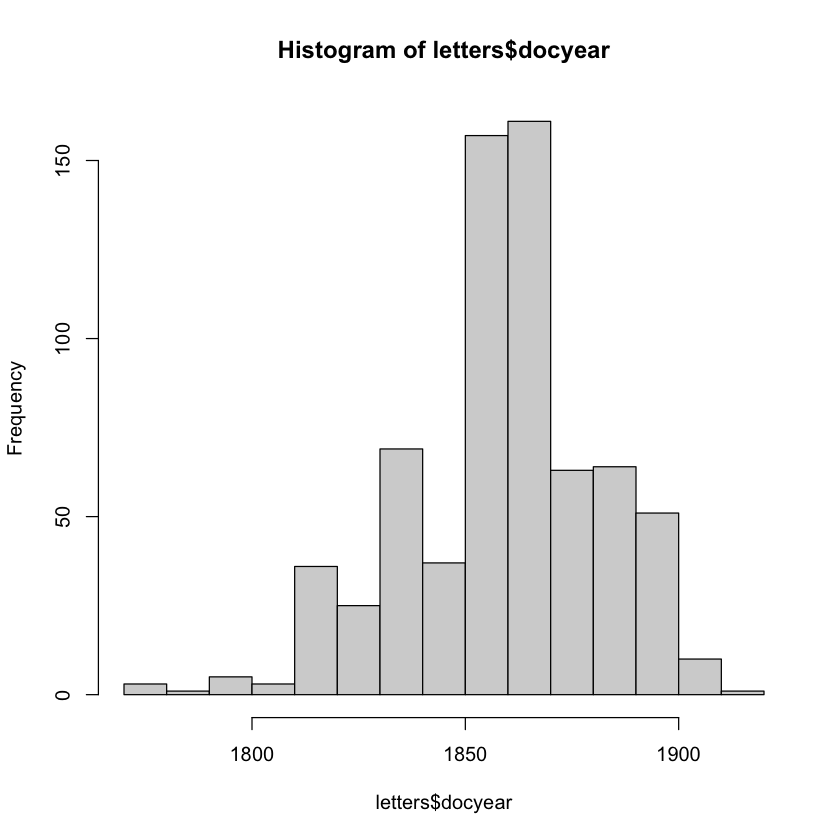

In [94]:
#What is the breakdown for year of writing

hist(letters$docyear)
summary(letters$docyear)

[1] 10


 1  2  3  4  5  6  7  8  9 10 11 12 
67 54 49 45 58 53 55 43 50 59 67 76 

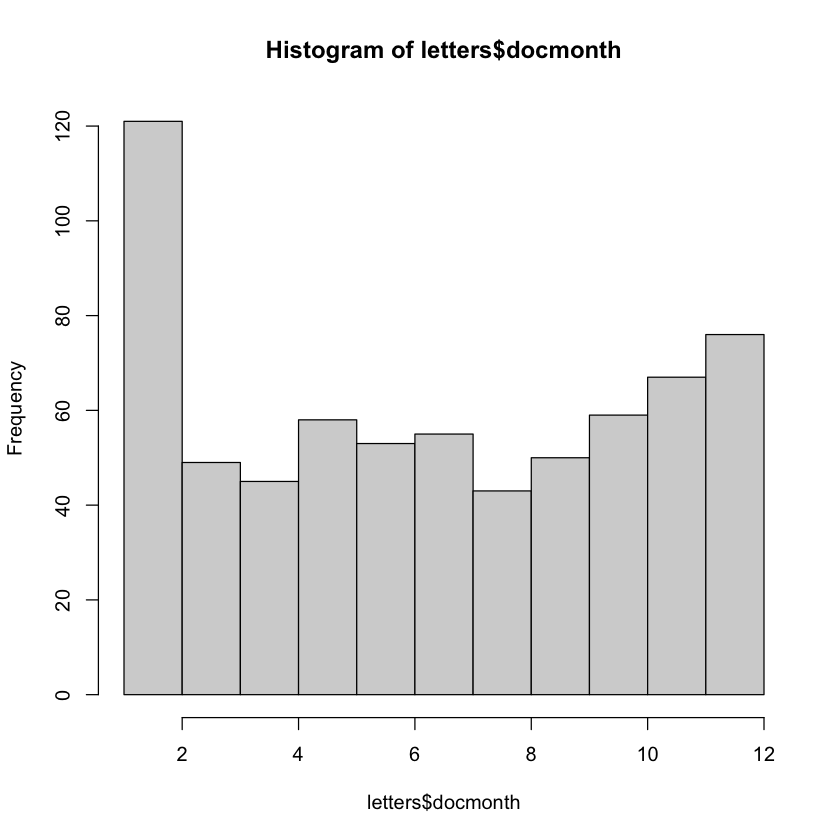

In [95]:
#What is the breakdown for month of writing

hist(letters$docmonth)
sum(is.na(letters$docmonth))
table(letters$docmonth)

In [98]:
#What is the breakdown for catholic

sum(is.na(letters$catholic))
sum(is.na(letters$catholic))/sum(nrow(letters))

letters %>% 
filter(is.na(catholic)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()

149/length(unique(letters$docauthorid))

[1] 337

[1] 0.4912536

[1] 149

[1] 0.8563218

In [100]:
#What is the breakdown for labour
sum(is.na(letters$L))
sum(is.na(letters$L))/sum(nrow(letters))

letters %>% 
filter(is.na(L)) %>% 
select(docauthorid) %>% 
unique() %>% 
nrow()

124/length(unique(letters$docauthorid))

[1] 291

[1] 0.4241983

[1] 124

[1] 0.7126437

## References

Conway, A. (1961). The Welsh in America: Letters from the immigrants. University of Minnesota Press. https://www.jstor.org/stable/10.5749/j.cttts8t0.

Fitzpatrick, D. (1999). Ireland and empire. In W. R. Louis & A. N. Porter (Eds.), The Oxford history of the British empire: The nineteenth century (pp. 494–521). Oxford University Press. https://doi.org/10.1093/acprof:oso/9780198205654.001.0001


Harkness, D. A. E. (1931). Irish emigration. In W. F. Willcox (Ed.), International migrations: Vol. II (Interpretations) (pp. 261–282). National Bureau of Economic Research. https://www.nber.org/books-and-chapters/international-migrations-volume-ii-interpretations/irish-emigration

Turnbull, T. (1914). T. Turnbull’s travels from the United States across the plains to California (F. L. (Frederic L. Paxson & R. G. Thwaites, Eds.). Madison, Published for the State Historical Society of Wisconsin. http://archive.org/details/tturnbullstravel00turnrich
